<a href="https://colab.research.google.com/github/sini-sam-20/Fetch-Take-Home-Assignment/blob/main/HubSpot_Integrations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2
import numpy as np

pd.set_option('display.width', 1000)

# Load Datasets

In [2]:
print("Current Working Directory:", os.getcwd())

Current Working Directory: /content


In [4]:
customer_metadata = pd.read_csv('customer_metadata.csv')
customer_integrations = pd.read_csv('customer_integrations.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'customer_metadata.csv'

In [ ]:
# Display the first few rows of each dataset and their shape
print("Customer Metadata:")
print(customer_metadata.head())
print(customer_metadata.shape)

print("\nCustomer Integrations:")
print(customer_integrations.head())
print(customer_integrations.shape)

# Data Processing

## Dataset Exploration

Basic info about the datasets including non-null count and the datatypes

In [ ]:
print("Customer Metadata Info:")
print(customer_metadata.info())

print("\nCustomer Integrations Info:")
print(customer_integrations.info())


Checking for missing values

In [ ]:
print("\nMissing Values in Customer Metadata:")
print(customer_metadata.isnull().sum())

print("\nMissing Values in Customer Integrations:")
print(customer_integrations.isnull().sum())

Merging the datasets, keeping all rows from the customer_metadata and matching records from customer_integrations

In [10]:
metadata_integration_data = pd.merge(
    customer_metadata,
    customer_integrations,
    on=['CUSTOMER_ID', 'SNAPSHOT_MONTH'],
    how='left' )


print("\nMerged Data:")
print(metadata_integration_data.head())
print(metadata_integration_data.shape)


Merged Data:
  CUSTOMER_ID SNAPSHOT_MONTH MARKETING_HUB_TIER  MARKETING_HUB_MRR  MARKETING_HUB_MRR_CANCELED SALES_HUB_TIER  SALES_HUB_MRR  SALES_HUB_MRR_CANCELED     INTEGRATION
0   C00020862        2024-01                Ent             840.22                         NaN     Enterprise         -17.55                     NaN  GoogleCalendar
1   C00020862        2024-01                Ent             840.22                         NaN     Enterprise         -17.55                     NaN     FacebookAds
2   C00020862        2024-01                Ent             840.22                         NaN     Enterprise         -17.55                     NaN       GoogleAds
3   C00020862        2024-01                Ent             840.22                         NaN     Enterprise         -17.55                     NaN        Calendly
4   C00020862        2024-01                Ent             840.22                         NaN     Enterprise         -17.55                     NaN        Typef

### Data Standardizing

Standardizing the data to TitleCase and Renaming column names to unsure consistency

In [11]:
categorical_columns = ['MARKETING_HUB_TIER', 'SALES_HUB_TIER', 'INTEGRATION']

In [12]:
for col in categorical_columns:
    metadata_integration_data[col] = metadata_integration_data[col].str.strip().str.title()

In [13]:
data_mapping = {
    'Googleads': 'Google Ads',
    'Googlecalendar': 'Google Calendar',
    'Facebookads': 'Facebook Ads',
    'Lin': 'LinkedIn',
    'Ent': 'Enterprise',
    'Pro': 'Professional'
}

In [14]:
for col in categorical_columns:
    metadata_integration_data[col] = metadata_integration_data[col].replace(data_mapping)
    print(f"Distinct values in '{col}': {metadata_integration_data[col].unique()}")

Distinct values in 'MARKETING_HUB_TIER': ['Enterprise' 'Starter' 'Professional' nan]
Distinct values in 'SALES_HUB_TIER': ['Enterprise' 'Starter' nan 'Professional']
Distinct values in 'INTEGRATION': ['Google Calendar' 'Facebook Ads' 'Google Ads' 'Calendly' 'Typeform'
 'Eventbrite' 'Gmail' 'Mailchimp' 'Instagram' 'Linkedin' 'Canva' nan
 'Zapier']


### Handling Missing Data

Replacing missing values for Categorical Fields - 'MARKETING_HUB_TIER', 'SALES_HUB_TIER', 'INTEGRATION'

In [15]:
for col in categorical_columns:
    metadata_integration_data[col] = metadata_integration_data[col].fillna('No Data')

Dropping duplicate records

In [16]:
metadata_integration_data = metadata_integration_data.drop_duplicates()

In [17]:
metadata_integration_data.isnull().sum()

,0
CUSTOMER_ID,0
SNAPSHOT_MONTH,0
MARKETING_HUB_TIER,0
MARKETING_HUB_MRR,32027
MARKETING_HUB_MRR_CANCELED,800326
SALES_HUB_TIER,0
SALES_HUB_MRR,606975
SALES_HUB_MRR_CANCELED,833529
INTEGRATION,0


In [18]:
metadata_integration_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846900 entries, 0 to 846899
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CUSTOMER_ID                 846900 non-null  object 
 1   SNAPSHOT_MONTH              846900 non-null  object 
 2   MARKETING_HUB_TIER          846900 non-null  object 
 3   MARKETING_HUB_MRR           814873 non-null  float64
 4   MARKETING_HUB_MRR_CANCELED  46574 non-null   float64
 5   SALES_HUB_TIER              846900 non-null  object 
 6   SALES_HUB_MRR               239925 non-null  float64
 7   SALES_HUB_MRR_CANCELED      13371 non-null   float64
 8   INTEGRATION                 846900 non-null  object 
dtypes: float64(4), object(5)
memory usage: 58.2+ MB


# Descriptive Analysis

Count unique values in categorical columns

In [78]:
metadata_integration_data_filtered = metadata_integration_data[metadata_integration_data['INTEGRATION'] != 'No Data']

for col in categorical_columns:
    print(f"\nUnique values in {col}: {metadata_integration_data[col].nunique()-1}")
    print(f"Distinct values in '{col}': {metadata_integration_data[col].unique()}")


Unique values in MARKETING_HUB_TIER: 3
Distinct values in 'MARKETING_HUB_TIER': ['Enterprise' 'Starter' 'Professional' 'No Data']

Unique values in SALES_HUB_TIER: 3
Distinct values in 'SALES_HUB_TIER': ['Enterprise' 'Starter' 'No Data' 'Professional']

Unique values in INTEGRATION: 12
Distinct values in 'INTEGRATION': ['Google Calendar' 'Facebook Ads' 'Google Ads' 'Calendly' 'Typeform'
 'Eventbrite' 'Gmail' 'Mailchimp' 'Instagram' 'Linkedin' 'Canva' 'No Data'
 'Zapier']


### Customer Analysis

**Count Unique Customers - Integration**

In [100]:
# With Integrations (Filtered out by 'No Data')

customers_with_integrations = metadata_integration_data[metadata_integration_data['INTEGRATION'] != 'No Data']
count_customers_with_integrations = customers_with_integrations['CUSTOMER_ID'].nunique()
customers_overall = metadata_integration_data['CUSTOMER_ID'].nunique()

count_customers_without_integrations = customers_overall - count_customers_with_integrations

print(f"Total Unique Users: {customers_overall}")
print(f"Users with integrations: {count_customers_with_integrations}")
print(f"Users without integrations: {count_customers_without_integrations}")

Total Unique Users: 54797
Users with integrations: 53567
Users without integrations: 1230


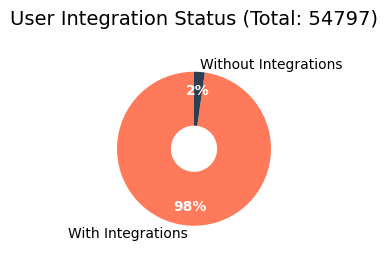

In [101]:
labels = ['With Integrations', 'Without Integrations']
sizes = [count_customers_with_integrations, count_customers_without_integrations]
colors = ['#ff7a5aff', '#2e3e51ff']

fig, ax = plt.subplots(figsize=(2.5, 2.5))
wedges, texts, autotexts = ax.pie(
    sizes, labels=labels, colors=colors, autopct='%1.0f%%', startangle=90,
    wedgeprops=dict(width=0.7), pctdistance=0.75, textprops={'fontsize': 10}
)

# Set percentage text color to white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
ax.set_title(f"User Integration Status (Total: {customers_overall})", fontsize=14, pad=20)

plt.show()

**Customers by Integration**

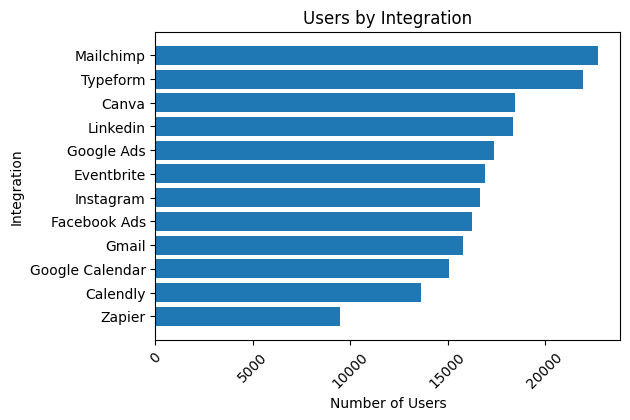

In [99]:
integration_customer_counts = metadata_integration_data_filtered.groupby('INTEGRATION')['CUSTOMER_ID'].nunique().reset_index()

plt.figure(figsize=(6, 4))

# Creating bar plot
integration_customer_counts_sorted = integration_customer_counts.sort_values(by='CUSTOMER_ID')
plt.barh(integration_customer_counts_sorted['INTEGRATION'], integration_customer_counts_sorted['CUSTOMER_ID'])

plt.title('Users by Integration')
plt.ylabel('Integration', fontsize=10)
plt.xlabel('Number of Users', fontsize=10)
plt.xticks(rotation=45)
plt.show()

**User - Integration Distribution**

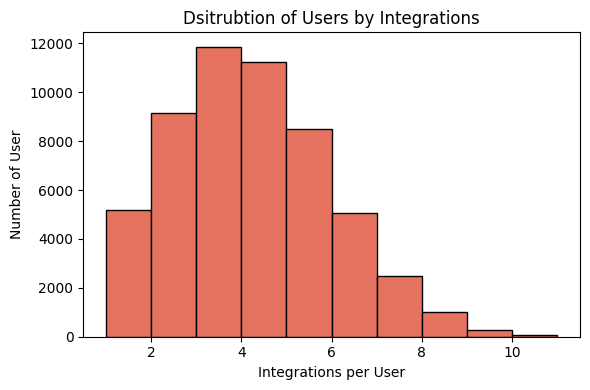

In [105]:
customer_integration_counts = metadata_integration_data.groupby('CUSTOMER_ID')['INTEGRATION'].nunique()

plt.figure(figsize=(6, 4))
plt.hist(customer_integration_counts, bins=range(customer_integration_counts.min(), customer_integration_counts.max() + 1),
         color='#e67360ff', edgecolor='black')

# Add titles and labels
plt.title('Dsitrubtion of Users by Integrations')
plt.xlabel('Integrations per User')
plt.ylabel('Number of User')

plt.tight_layout()
plt.show()

**Customers - Hub Distribution**


In [107]:
# Filter the dataset for customers where Hub Tier and Integration are not 'No Data'
marketing_customers = metadata_integration_data_filtered[
    (metadata_integration_data_filtered['MARKETING_HUB_TIER'] != 'No Data')
]
sales_customers = metadata_integration_data_filtered[
    (metadata_integration_data_filtered['SALES_HUB_TIER'] != 'No Data')
]

marketing_sales_customers = metadata_integration_data_filtered[
    (metadata_integration_data_filtered['MARKETING_HUB_TIER'] != 'No Data') &
    (metadata_integration_data_filtered['SALES_HUB_TIER'] != 'No Data')
]

marketing_customers = marketing_customers['CUSTOMER_ID'].nunique()
sales_customers = sales_customers['CUSTOMER_ID'].nunique()
marketing_sales_customers = marketing_sales_customers['CUSTOMER_ID'].nunique()

print(f"Marketing Users: {marketing_customers}")
print(f"\nSales Users: {sales_customers}")
print(f"\nBoth Marketing & Sales Users: {marketing_sales_customers}")


Marketing Users: 53033

Sales Users: 17071

Both Marketing & Sales Users: 16537


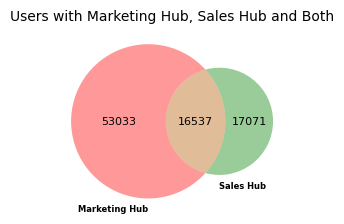

In [108]:
# Venn diagram for Marketing, Sales, and Both
fig, ax = plt.subplots(figsize=(3, 3))
venn = venn2(subsets=(marketing_customers,sales_customers,
                      marketing_sales_customers
                     ),
             set_labels=('Marketing Hub', 'Sales Hub', 'Both'),
             ax=ax)

for label in venn.set_labels:
    label.set_fontsize(6)
    label.set_fontweight('bold')

for label in venn.subset_labels:
    label.set_fontsize(8)

ax.set_title("Users with Marketing Hub, Sales Hub and Both", fontsize=10)
plt.show()

In [120]:
import numpy as np

# Assign 'Product' column based on conditions
metadata_integration_data_filtered['Product'] = np.select(
    [
        (metadata_integration_data_filtered['MARKETING_HUB_TIER'] != 'No Data') & (metadata_integration_data_filtered['SALES_HUB_TIER'] != 'No Data'),
        (metadata_integration_data_filtered['MARKETING_HUB_TIER'] != 'No Data'),
        (metadata_integration_data_filtered['SALES_HUB_TIER'] != 'No Data')
    ],
    ['Marketing & Sales', 'Marketing', 'Sales'],
    default='No Data'
)

# Get the unique count of customers per 'Product'
customer_count_per_product = metadata_integration_data_filtered.groupby('Product')['CUSTOMER_ID'].nunique()

# Display the customer counts
print(customer_count_per_product)
print(metadata_integration_data_filtered['Product'].value_counts())


<ipython-input-120-1790e5eeed1b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_integration_data_filtered['Product'] = np.select(


Product
Marketing            43712
Marketing & Sales    16537
Sales                 3249
Name: CUSTOMER_ID, dtype: int64
Product
Marketing            601249
Marketing & Sales    206080
Sales                 31687
Name: count, dtype: int64


**Descriptive Statistics of MRR and Cancellation**

In [56]:
print("Descriptive Statistics:")
print(metadata_integration_data.describe().T)

Descriptive Statistics:
                               count        mean         std    min     25%      50%      75%      max
MARKETING_HUB_MRR           814873.0  318.819880  369.529379   1.00  15.320  292.190   395.38  3345.21
MARKETING_HUB_MRR_CANCELED   46574.0  247.623371  325.423645   1.00  11.210   63.035   361.47  2612.12
SALES_HUB_MRR               239925.0  528.994148  598.121749 -17.55  14.450  282.660  1056.34  3051.00
SALES_HUB_MRR_CANCELED       13371.0  440.512222  555.413229   1.00  10.685  242.430   724.99  2587.58


2. Unique Counts

4. Cancellation Rates

In [ ]:
marketing_cancellation_rate = metadata_integration_data['MARKETING_HUB_MRR_CANCELED'].sum() / metadata_integration_data['MARKETING_HUB_MRR'].sum()
print(f"Marketing Hub Cancellation Rate: {marketing_cancellation_rate:.2%}")

sales_cancellation_rate = metadata_integration_data['SALES_HUB_MRR_CANCELED'].sum() / metadata_integration_data['SALES_HUB_MRR'].sum()
print(f"Sales Hub Cancellation Rate: {sales_cancellation_rate:.2%}")

Marketing Hub Cancellation Rate: 4.62%
Sales Hub Cancellation Rate: 4.86%


5. Distribution of MRR

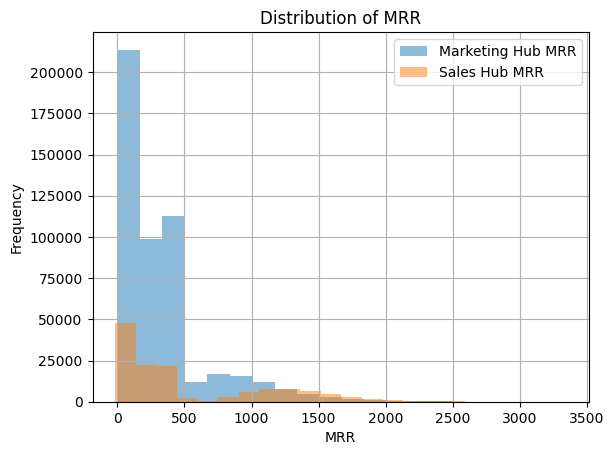

In [ ]:
metadata_integration_data['MARKETING_HUB_MRR'].hist(bins=20, alpha=0.5, label='Marketing Hub MRR')
metadata_integration_data['SALES_HUB_MRR'].hist(bins=20, alpha=0.5, label='Sales Hub MRR')
plt.legend()
plt.title("Distribution of MRR")
plt.xlabel("MRR")
plt.ylabel("Frequency")
plt.show()


6. Integration Usage by Tier

In [ ]:
print("Integration Usage by Marketing Hub Tier:")
print(metadata_integration_data.groupby('MARKETING_HUB_TIER')['INTEGRATION'].value_counts())

print("\nIntegration Usage by Sales Hub Tier:")
print(metadata_integration_data.groupby('SALES_HUB_TIER')['INTEGRATION'].value_counts())

Integration Usage by Marketing Hub Tier:
MARKETING_HUB_TIER  INTEGRATION    
Enterprise          No Data             9339
                    Typeform            7210
                    Canva               6269
                    Linkedin            6102
                    Eventbrite          5754
                    Google Ads          5726
                    Instagram           5622
                    Gmail               5433
                    Mailchimp           5246
                    Google Calendar     5194
                    Calendly            5016
                    Facebook Ads        4155
                    Zapier              3912
No Data             No Data             3718
                    Typeform            1349
                    Instagram           1229
                    Canva               1045
                    Linkedin            1008
                    Eventbrite          1000
                    Google Ads           977
                    Gma

7. Customer Retention Metrics

In [ ]:
marketing_starting_value = metadata_integration_data['MARKETING_HUB_MRR'].sum()
marketing_lost_value = metadata_integration_data['MARKETING_HUB_MRR_CANCELED'].sum()
marketing_customer_dollar_retention = (1 - (marketing_lost_value / marketing_starting_value)) ** 12
print(f"Marketing Hub: Customer Dollar Retention (C$R): {marketing_customer_dollar_retention:.2%}")

sales_starting_value = metadata_integration_data['SALES_HUB_MRR'].sum()
sales_lost_value = metadata_integration_data['SALES_HUB_MRR_CANCELED'].sum()
sales_customer_dollar_retention = (1 - (sales_lost_value / sales_starting_value)) ** 12
print(f"Sales Hub: Customer Dollar Retention (C$R): {sales_customer_dollar_retention:.2%}")


Marketing Hub: Customer Dollar Retention (C$R): 56.72%
Sales Hub: Customer Dollar Retention (C$R): 54.98%


In [ ]:
metadata_integration_data['SNAPSHOT_MONTH'] = pd.to_datetime(metadata_integration_data['SNAPSHOT_MONTH'])
monthly_mrr = metadata_integration_data.groupby('SNAPSHOT_MONTH')['MARKETING_HUB_MRR'].sum()
print("Monthly MRR Trends:")
print(monthly_mrr)

<class 'ValueError'>: time data "No Data" doesn't match format "%Y-%m", at position 6. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
5. Correlation Analysis

In [ ]:
print("Correlation Matrix:")
print(metadata_integration_data.corr())

Correlation Matrix:


<class 'ValueError'>: could not convert string to float: 'Enterprise'

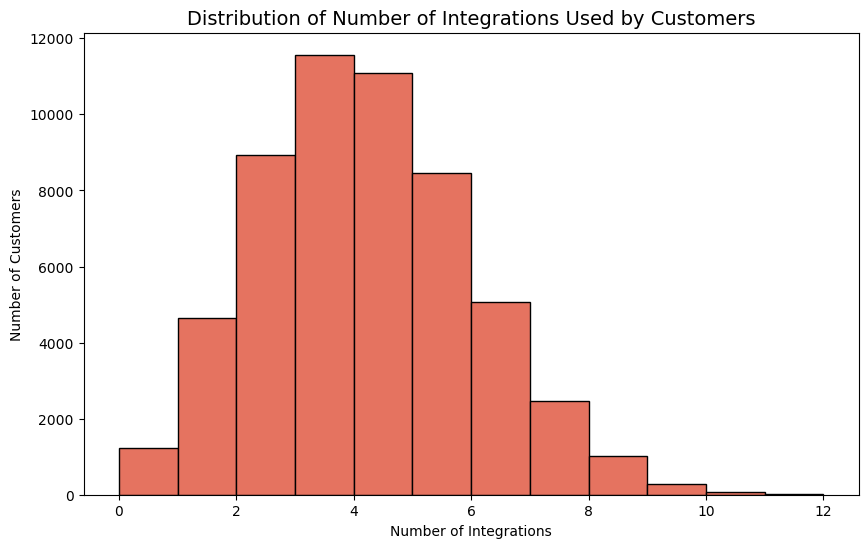

In [ ]:
# Group by CUSTOMER_ID and SNAPSHOT_MONTH, then count the number of integrations
integrations_per_customer = metadata_integration_data.groupby(['CUSTOMER_ID'])['INTEGRATION'].nunique().reset_index()
integrations_per_customer.rename(columns={'INTEGRATION': 'NUM_INTEGRATIONS'}, inplace=True)

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(integrations_per_customer['NUM_INTEGRATIONS'], bins=range(0, integrations_per_customer['NUM_INTEGRATIONS'].max() + 2), edgecolor='black', color='#e57360ff')

plt.title('Distribution of Number of Integrations Used by Customers', fontsize=14)
plt.xlabel('Number of Integrations', fontsize=10)
plt.ylabel('Number of Customers', fontsize=10)
plt.show()


In [ ]:
total_customers = integrations_per_customer['CUSTOMER_ID'].nunique()
print(f"Total number of customers: {total_customers}")

# Define the bins
bin_1_2 = integrations_per_customer[(integrations_per_customer['NUM_INTEGRATIONS'] >= 1) & (integrations_per_customer['NUM_INTEGRATIONS'] <= 2)]
bin_3_5 = integrations_per_customer[(integrations_per_customer['NUM_INTEGRATIONS'] >= 3) & (integrations_per_customer['NUM_INTEGRATIONS'] <= 5)]
bin_6_plus = integrations_per_customer[integrations_per_customer['NUM_INTEGRATIONS'] >= 6]

# Count the number of customers in each bin
count_1_2 = bin_1_2['CUSTOMER_ID'].nunique()
count_3_5 = bin_3_5['CUSTOMER_ID'].nunique()
count_6_plus = bin_6_plus['CUSTOMER_ID'].nunique()

Total number of customers: 54797
24.77% of customers use 1-2 integrations.
56.77% of customers use 3-5 integrations.
16.22% of customers use 6 or more integrations.


# Saving Dataset

In [ ]:
metadata_integration_data.to_csv('final_dataset_customer_metadata_integration.csv', index=False)